In [2]:
import matplotlib.pyplot as plt
from Mlp import Mlp
from Citra import Citra
import cv2 as cv

Using TensorFlow backend.


In [19]:
# cap = cv.VideoCapture('http://192.168.13.7:8080/video')
cap = cv.VideoCapture('data/data mentah/baru/video/3.3gp')
mlp = Mlp('hasil learning/v2/model NN 94.16666666666667.json', 'hasil learning/v2/model NN 94.16666666666667.h5', 'categorical_crossentropy', 'sgd')
mlp.outputClass = ['mentah', 'setah', 'setang', 'matang']
    
while(True):
    ret, frame = cap.read()
    
    if ret == False:
        cap.set(2, 0)
        continue

    citra = Citra(frame)
    citra.resize((1024, 768))
    citra.toGray()
    citra.toBinaryInv(150, 255)
    cc = citra.getContour(4000, 50000)
    cc.classify = True
    cc.classifier = mlp
    cc.croppedResize = (128, 128)
    cc.findContour()
    cv.imshow('Hasil', cc.labeled)
    if cv.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv.destroyAllWindows()

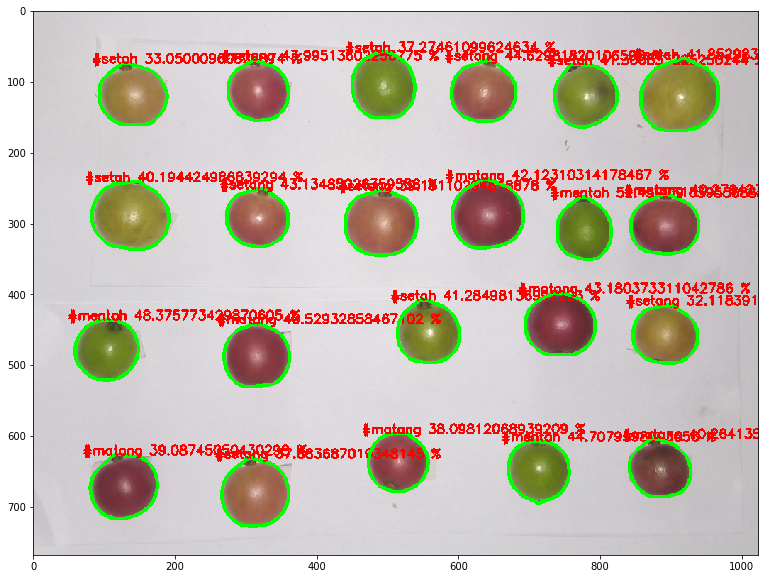

In [13]:
plt.figure(figsize=(13,13))

mlp = Mlp('hasil learning/v2/model NN 94.16666666666667.json', 'hasil learning/v2/model NN 94.16666666666667.h5', 'categorical_crossentropy', 'sgd')
mlp.outputClass = ['mentah', 'setah', 'setang', 'matang']

citra = Citra(cv.imread('data/data mentah/baru/IMG_20181208_174220.jpg'))
citra.resize((1024, 768))
citra.toGray()
citra.toBinaryInv(150, 255)
cc = citra.getContour(6000, 500000)
cc.classify = True
cc.classifier = mlp
cc.croppedResize = (128, 128)
cc.findContour()
plt.imshow(cv.cvtColor(cc.labeled, cv.COLOR_BGR2RGB))
# plt.imshow(citra.processed, cmap='gray')
plt.show()